In [139]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

from IPython.display import display, Markdown, Latex

## Penyelesaian akar persamaan dengan metode numerik

Dikarenakan beberapa kekurangan metode yang telah disebutkan, maka cara menyelesaikan akar persamaan yang sering digunakan adalah dengan metode numerik. **Sebagai catatan, metode grafik masih menjadi metode yang sangat penting untuk digunakan dengan segala kekurangannya, karena metode grafik akan memberikan kita ancer-ancer dari nilai akar persamaan yang kita cari**. Secara umum penyelesaian akar persamaan dengan metode numerik terbagi menjadi dua kelompok, yaitu metode kurung (*bracket method*) dan metode terbuka (*open method*). 

## Metode Kurung (*Bracket Method*)

Metode kurung adalah metode numerik yang digunakan untuk mencari akar persamaan dengan menemukan interval yang mengandung akar persamaan. Metode ini cukup sederhana, namun dapat memberikan hasil yang cukup akurat. Artikel ini akan membahas secara detail tentang metode kurung, termasuk cara kerja, kelebihan, kekurangan, dan contoh penggunaannya.

### Cara Kerja Metode Kurung

Metode kurung atau bracketing method bekerja dengan mencari interval [a, b] yang mengandung akar persamaan. Interval ini kemudian dibagi menjadi subinterval yang lebih kecil dan dicari apakah subinterval tersebut mengandung akar persamaan atau tidak. Cara mengetahui apakah adalam interval tersebut ada akar persamaan adalah dengan melihat tanda *f(a)* dan *f(b)*, jika *f(a)* dan *f(b)* memiliki tanda yang berlawanan, berarti minimal persamaan tersebut mempunyai 1 akar persamaan (lihat penjelasan sebelumnya). Cara ini dilakukan secara terus menerus hingga interval yang mengandung akar persamaan ditemukan dengan akurasi yang memadai.

Algoritma umum metode kurung adalah sebagai berikut:

1. Tentukan interval [a, b] yang mengandung akar persamaan
2. Hitung nilai f(a) dan f(b). Pada iterasi pertama jika f(a) dan f(b) memiliki tanda yang sama, ganti nilai a atau b sehingga nilai f(a) dan f(b) mempunyai tanda yang berlawanan.
3. tentukan nilai iterasi selanjutnya *x'* dan *f(x')*. Untuk menentukan nilai iterasi selanjutnya terdapat beberapa cara yang akan kita jelaskan lebih lanjut.
4. Ulangi langkah 2-3 sampai perbedaan nilai *x'* pada saat ini dan iterasi sebelumnya sangat dekat dengan nol

Ada dua jenis metode kurung yang umum digunakan, yaitu metode bagi dua dan metode regula falsi.

## Metode Bagi Dua (*Bisection*)

Metode bagi dua adalah salah satu jenis metode kurung yang paling sederhana dan paling umum digunakan. Metode ini bekerja dengan membagi interval [a, b] menjadi dua subinterval yang sama besar, kemudian mengevaluasi nilai fungsi pada titik tengah interval. Jika nilai fungsi pada titik tengah interval sangat dekat dengan nol, maka akar persamaan telah ditemukan. Jika tidak, batas interval yang mengandung akar persamaan diganti dengan subinterval yang memiliki tanda yang berbeda pada nilai fungsi f(a) dan f(b). Proses ini diulangi sampai nilai fungsi sangat dekat dengan nol (lihat gambar di bawah).


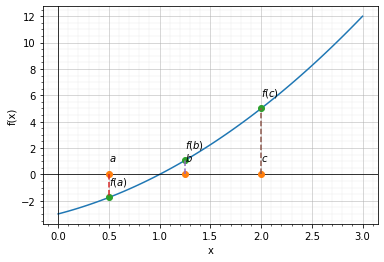

In [140]:
# Grafik
x = np.linspace(0,3, 100)
y = (x+3)*(x-1)

fig, ax = plt.subplots()
ax.plot(x, y)
# ax.plot(x, y0, 'black', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.75)
plt.axvline(0, color='black', linewidth=0.75)
ax.grid(which='major', linewidth=0.5)
ax.minorticks_on()
ax.grid(which='minor', linewidth=0.1)
plt.xlabel('x')
plt.ylabel('f(x)')


x1 = [0.5, 1.25, 2]
y1 = [0, 0, 0]
y2 = [(i+3)*(i-1) for i in x1]
ax.plot(x1, y1, 'o')
ax.text(x1[0], y1[0]+1,r'$a$')
ax.text(x1[1], y1[1]+1,r'$b$')
ax.text(x1[2], y1[2]+1,r'$c$')


ax.plot(x1, y2, 'o')
ax.text(x1[0], y2[0]+1,r'$f(a)$')
ax.text(x1[1], y2[1]+1,r'$f(b)$')
ax.text(x1[2], y2[2]+1,r'$f(c)$')

ax.plot([x1[0], x1[0]], [y1[0], y2[0]], '--')
ax.plot([x1[1], x1[1]], [y1[1], y2[1]], '--')
ax.plot([x1[2], x1[2]], [y1[2], y2[2]], '--')
plt.show()

Algoritma metode bagi dua adalah sebagai berikut:

1. Tentukan interval [a, b] yang mengandung akar persamaan
2. Hitung nilai f(a) dan f(b). Pada iterasi pertama, jika f(a) dan f(b) memiliki tanda yang sama, ganti nilai a atau b dengan nilai lain sehingga nilai f(a) dan f(b) berlawanan tanda.
3. Hitung nilai f(c), dengan:

$$ c = {a + b \over 2} $$

4. Jika *c* sangat dekat dengan nol atau selisih nilai *c* saat ini dengan iterasi sebelumnya mendekati nol, maka akar persamaan telah ditemukan
5. Jika f(a) dan f(c) memiliki tanda yang berbeda, ganti nilai b dengan c; jika sebaliknya, ganti nilai a dengan c
6. Ulangi langkah (3) s.d. (5) hingga selisih nilai c saat ini dengan iterasi sebelumnya mendekati nol.

### Contoh

Tentukan akar dari persamaan $ f(x) = x^2 - 5 x + 6 $ pada interval [1, 2.5] menggunakan metode *bisection* dengan batas toleransi error = 0.1 %

**Jawab**

Pertama-tama kita tentukan nilai $a = 1$ dan $b = 2.5$. Lalu kita lanjutkan dengan iterasi hingga toleransi error = 0.1 %. Kode python dan hasilnya ditunjukkan pada listing dan tabel di bawah ini:

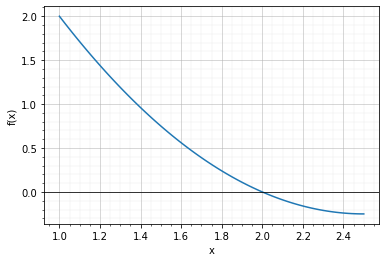

In [141]:
# Grafik
x = np.linspace(1,2.5, 100)
y = x**2 - 5*x + 6

fig, ax = plt.subplots()
ax.plot(x, y)
# ax.plot(x, y0, 'black', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.75)
# plt.axvline(0, color='black', linewidth=0.75)
ax.grid(which='major', linewidth=0.5)
ax.minorticks_on()
ax.grid(which='minor', linewidth=0.1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [151]:
def bisection(a,b, f, e=1., n = 10): 
    cold = 0
    for i in range(n):
        fa = f(a)
        fb = f(b)
        if fa*fb  > 0:
            print("Coba tebakan awal yang lainnya!")
            return 
        c= (a+b)/2. 
        fc= f(c)
        
        if i > 0:
            err = abs((c - cold)*100/c)
            if err < e:
                break 
            
        if fa*fc > 0:
            a= c  
        elif fa*fc < 0: 
            b= c
        else:
            break

        cold = c 
    return c 

def f (x):
    return x**2 - 5*x + 6

print(bisection(1, 2.5, f, 0.1)) 

2.00048828125


In [167]:
def bisection(a,b, f, e=1., n = 10):
    xl = []
    xr = []
    c = []
    fl = []
    fr = []
    fc = []
    err = [None]
    xl.append(a)
    xr.append(b)
    for i in range(n):
        fl.append(f(xl[i]))
        fr.append(f(xr[i]))
        if fl[i]*fr[i] > 0:
            print("Coba tebakan awal yang lainnya!")
            return
        c.append((xl[i]+xr[i])/2 )
        fc.append(f(c[i]))
        
        if i > 0:
            err.append(abs((c[i] - c[i-1])*100/c[i])) 
            if err[i] < e:
                break
        if i <= 2:
            er = err[i]
            if i > 0:
                er = round(  err[i], 5)
            
            display(Markdown("\n*Iterasi ke-{}*\n\nDidapatkan $a={}$, $b={}$, $c = (a + b) / 2 = {} $, $f(a) = {} $, $f(b) = {} $, $f(c) = {} $, error = {} % ".format(i, round( xl[i], 5), round(  xr[i], 5), round(  c[i], 5), round(  fl[i], 5), round(  fr[i], 5), round(  fc[i], 5), er )))
        if i == 2:
            display(Markdown("Dengan cara yang sama dilanjutkan proses iterasi hingga error <= {}. Nilai iterasi bisa dilihat pada Tabel di bawah:\n".format(e)))
        if i < n - 1:
            if fl[i]*fc[i] > 0:
                xl.append(c[i]) 
                xr.append(xr[i])
            elif fl[i]*fc[i] < 0:
                xl.append(xl[i])
                xr.append( c[i])
            else:
                break 
    dat = pd.DataFrame({'a':xl, 'b':xr, 'c':c, 'f(a)':fl, 'f(b)':fr, 'fc':fc, 'error': err})
    return c[i], dat, err[i]

def f (x):
    return x**2 - 5*x + 6

c, dat, err = bisection(1, 2.5, f, 0.1)

display(dat)
# dat

display(Markdown("\nNilai akar persamaan yang didapat adalah {}, dengan error sebesar {}".format(round(c, 5), round(err,5))))


*Iterasi ke-0*

Didapatkan $a=1$, $b=2.5$, $c = (a + b) / 2 = 1.75 $, $f(a) = 2 $, $f(b) = -0.25 $, $f(c) = 0.3125 $, error = None % 


*Iterasi ke-1*

Didapatkan $a=1.75$, $b=2.5$, $c = (a + b) / 2 = 2.125 $, $f(a) = 0.3125 $, $f(b) = -0.25 $, $f(c) = -0.10938 $, error = 17.64706 % 


*Iterasi ke-2*

Didapatkan $a=1.75$, $b=2.125$, $c = (a + b) / 2 = 1.9375 $, $f(a) = 0.3125 $, $f(b) = -0.10938 $, $f(c) = 0.06641 $, error = 9.67742 % 

Dengan cara yang sama dilanjutkan proses iterasi hingga error <= 0.1. Nilai iterasi bisa dilihat pada Tabel di bawah:


,a,b,c,f(a),f(b),fc,error
0,1.000000,2.500000,1.750000,2.000000,-0.250000,0.312500,NaN
1,1.750000,2.500000,2.125000,0.312500,-0.250000,-0.109375,17.647059
2,1.750000,2.125000,1.937500,0.312500,-0.109375,0.066406,9.677419
3,1.937500,2.125000,2.031250,0.066406,-0.109375,-0.030273,4.615385
4,1.937500,2.031250,1.984375,0.066406,-0.030273,0.015869,2.362205
5,1.984375,2.031250,2.007812,0.015869,-0.030273,-0.007751,1.167315
6,1.984375,2.007812,1.996094,0.015869,-0.007751,0.003922,0.587084
7,1.996094,2.007812,2.001953,0.003922,-0.007751,-0.001949,0.292683
8,1.996094,2.001953,1.999023,0.003922,-0.001949,0.000978,0.146556
9,1.999023,2.001953,2.000488,0.000978,-0.001949,-0.000488,0.073224



Nilai akar persamaan yang didapat adalah 2.00048828125, dengan error sebesar 0.0732243104710764

## Metode Regula Falsi

Metode regula falsi atau *false position method* adalah salah satu jenis metode kurung yang digunakan untuk mempercepat konvergensi pencarian akar persamaan. Metode ini bekerja dengan menentukan titik potong  (*c*) fungsi *f(x)* dengan sumbu-x, yang mana Titik *c* berada di antara dua Titik *a* dan *b*, dengan mengasumsikan fungsi *f(x)* linear. Titik potong *c* ini kemudian digunakan sebagai estimasi akar persamaan pada subinterval yang baru.

Metode ini disebut "false position" karena posisi Titik *c* tersebut salah, bukan posisi perpotongan kurva yang sebenarnya, karena kita mengasumsikan fungsi kurva sebagai fungsi linear. Untuk mengestimasi Titik *c*, kita bisa menggunakan persamaan segitiga biasa, sehingga kita dapatkan nilai Titik *c*:

$$c = a - {f(a) (b - a) \over f(b) - f(a)} \label{eq:regula-falsi}$$


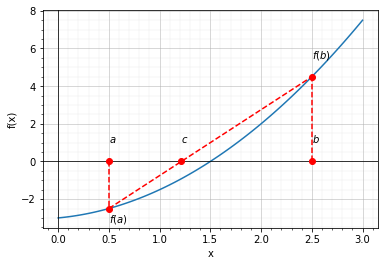

In [168]:
# Grafik
x = np.linspace(0,3, 100)
y = (x+2)*(x-1.5)

fig, ax = plt.subplots()
ax.plot(x, y)
# ax.plot(x, y0, 'black', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.75)
plt.axvline(0, color='black', linewidth=0.75)
ax.grid(which='major', linewidth=0.5)
ax.minorticks_on()
ax.grid(which='minor', linewidth=0.1)
plt.xlabel('x')
plt.ylabel('f(x)')


x1 = [0.5, 2.5]
y1 = [0, 0]
y2 = [(i+2)*(i-1.5) for i in x1]
xc = x1[0]-y2[0]*(x1[1]-x1[0])/(y2[1]-y2[0])
ax.plot(x1, y1, 'or')
ax.plot([xc], [0], 'or')
ax.text(x1[0], y1[0]+1,r'$a$')
ax.text(x1[1], y1[1]+1,r'$b$')
ax.text(xc, 0+1,r'$c$')


ax.plot(x1, y2, 'or')
ax.text(x1[0], y2[0]-0.75,r'$f(a)$')
ax.text(x1[1], y2[1]+1,r'$f(b)$')
# ax.text(x1[2], y2[2]+1,r'$f(c)$')

ax.plot([x1[0], x1[0]], [y1[0], y2[0]], '--r')
ax.plot([x1[1], x1[1]], [y1[1], y2[1]], '--r')
ax.plot([x1[0], x1[1]], [y2[0], y2[1]], '--r')
plt.show()

Algoritma metode regula falsi adalah sebagai berikut:

1. Tentukan interval [a, b] yang mengandung akar persamaan
2. Hitung nilai f(a) dan f(b), dimana tanda dua nilai ini harus berlawanan.
3. Tentukan titik potong garis lurus (Titik "c") yang menghubungkan titik (a, f(a)) dan (b, f(b)) dengan Persamaan \ref{eq:regula-falsi}.
4. Hitung nilai f(c)
5. Jika *c* sangat dekat dengan nol atau selisih nilai saat ini dengan iterasi sebelumnya sangat dekat nol, akar persamaan telah ditemukan
6. Jika f(a) dan f(c) memiliki tanda yang berbeda, ganti nilai b dengan c, jika sebaliknya, ganti nilai a dengan c
7. Ulangi langkah 2-6

Algoritma metode bagi dua adalah sebagai berikut:

1. Tentukan interval [a, b] yang mengandung akar persamaan
2. Hitung nilai f(a) dan f(b). Pada iterasi pertama, jika f(a) dan f(b) memiliki tanda yang sama, ganti nilai a atau b dengan nilai lain sehingga nilai f(a) dan f(b) berlawanan tanda.
3. Hitung nilai f(c), dengan c = (a + b)/2
4. Jika *c* sangat dekat dengan nol atau selisih nilai *c* saat ini dengan iterasi sebelumnya mendekati nol, maka akar persamaan telah ditemukan
5. Jika f(a) dan f(c) memiliki tanda yang berbeda, ganti nilai b dengan c; jika sebaliknya, ganti nilai a dengan c
6. Ulangi langkah (3) s.d. (5) hingga selisih nilai c saat ini dengan iterasi sebelumnya mendekati nol.

### Contoh

Seperti pada contoh sebelumnya tetapi menggunakan metod.e regula falsi Tentukan akar dari persamaan $ f(x) = x^2 - 5 x + 6 $ pada interval [1, 2.5] menggunakan metode *regula falsi* dengan batas toleransi error = 0.1 %

**Jawab**

Pertama-tama kita tentukan nilai $a = 1$ dan $b = 2.5$. Lalu kita lanjutkan dengan iterasi hingga toleransi error = 0.1 %. Kode python dan hasilnya ditunjukkan pada listing dan tabel di bawah ini:

In [171]:
def regula_falsi(a,b, f, e=1., n = 10): 
    cold = 0
    for i in range(n):
        fa = f(a)
        fb = f(b)
        if fa*fb  > 0:
            print("Coba tebakan awal yang lainnya!")
            return 
        c= a - fa* (b-a)/(fb-fa)
        fc= f(c)
        
        if i > 0:
            err = abs((c - cold)*100/c)
            if err < e:
                break 
            
        if fa*fc > 0:
            a= c  
        elif fa*fc < 0: 
            b= c
        else:
            break

        cold = c 
    return c 

def f (x):
    return x**2 - 5*x + 6

print(regula_falsi(1, 2.5, f, 0.1)) 

2.0019493177387915


In [172]:
def regula_falsi(a,b, f, e=1., n = 10):
    xl = []
    xr = []
    c = []
    fl = []
    fr = []
    fc = []
    err = [None]
    xl.append(a)
    xr.append(b)
    for i in range(n):
        fl.append(f(xl[i]))
        fr.append(f(xr[i]))
        if fl[i]*fr[i] > 0:
            print("Coba tebakan awal yang lainnya!")
            return
        c.append(xl[i] - fl[i]*(xr[i]-xl[i])/(fr[i]-fl[i]) )
        fc.append(f(c[i]))
        
        if i > 0:
            err.append(abs((c[i] - c[i-1])*100/c[i])) 
            if err[i] < e:
                break
        if i <= 2:
            er = err[i]
            if i > 0:
                er = round(  err[i], 5)
            
            display(Markdown("\n*Iterasi ke-{}*\n\nDidapatkan $a={}$, $b={}$, $c = (a + b) / 2 = {} $, $f(a) = {} $, $f(b) = {} $, $f(c) = {} $, error = {} % ".format(i, round( xl[i], 5), round(  xr[i], 5), round(  c[i], 5), round(  fl[i], 5), round(  fr[i], 5), round(  fc[i], 5), er )))
            
        if i == 2:
            display(Markdown("Dengan cara yang sama dilanjutkan proses iterasi hingga error <= {}. Nilai iterasi bisa dilihat pada Tabel di bawah:\n".format(e)))
        if i < n - 1:
            if fl[i]*fc[i] > 0:
                xl.append(c[i]) 
                xr.append(xr[i])
            elif fl[i]*fc[i] < 0:
                xl.append(xl[i])
                xr.append( c[i])
            else:
                break 
    dat = pd.DataFrame({'a':xl, 'b':xr, 'c':c, 'f(a)':fl, 'f(b)':fr, 'fc':fc, 'error': err})
    return c[i], dat, err[i]

def f (x):
    return x**2 - 5*x + 6

c, dat, err = regula_falsi(1, 2.5, f, 0.1)

display(dat)
# dat

display(Markdown("\nNilai akar persamaan yang didapat adalah {}, dengan error sebesar {}".format(round(c, 5), round(err,5))))


*Iterasi ke-0*

Didapatkan $a=1$, $b=2.5$, $c = (a + b) / 2 = 2.33333 $, $f(a) = 2 $, $f(b) = -0.25 $, $f(c) = -0.22222 $, error = None % 


*Iterasi ke-1*

Didapatkan $a=1$, $b=2.33333$, $c = (a + b) / 2 = 2.2 $, $f(a) = 2 $, $f(b) = -0.22222 $, $f(c) = -0.16 $, error = 6.06061 % 


*Iterasi ke-2*

Didapatkan $a=1$, $b=2.2$, $c = (a + b) / 2 = 2.11111 $, $f(a) = 2 $, $f(b) = -0.16 $, $f(c) = -0.09877 $, error = 4.21053 % 

Dengan cara yang sama dilanjutkan proses iterasi hingga error <= 0.1. Nilai iterasi bisa dilihat pada Tabel di bawah:


,a,b,c,f(a),f(b),fc,error
0,1,2.500000,2.333333,2,-0.250000,-0.222222,NaN
1,1,2.333333,2.200000,2,-0.222222,-0.160000,6.060606
2,1,2.200000,2.111111,2,-0.160000,-0.098765,4.210526
3,1,2.111111,2.058824,2,-0.098765,-0.055363,2.539683
4,1,2.058824,2.030303,2,-0.055363,-0.029385,1.404741
5,1,2.030303,2.015385,2,-0.029385,-0.015148,0.740227
6,1,2.015385,2.007752,2,-0.015148,-0.007692,0.380160
7,1,2.007752,2.003891,2,-0.007692,-0.003876,0.192670
8,1,2.003891,2.001949,2,-0.003876,-0.001946,0.096992



Nilai akar persamaan yang didapat adalah 2.0019493177387915, dengan error sebesar 0.09699210802495685


---

### Kelebihan Metode Kurung

Metode kurung memiliki beberapa kelebihan yang membuatnya sering digunakan dalam mencari akar persamaan. Kelebihan tersebut antara lain:

1. Metode ini cukup sederhana dan mudah dipahami.
2. Metode kurung memiliki konvergensi yang cukup cepat pada interval yang cukup kecil.
3. Metode ini dapat memberikan estimasi interval yang mengandung akar persamaan dengan cukup akurat.

### Kekurangan Metode Kurung

Selain kelebihan, metode kurung juga memiliki kekurangan yang perlu diperhatikan sebelum digunakan dalam mencari akar persamaan. Kekurangan tersebut antara lain:

1. Metode kurung bisa tidak konvergen atau konvergen lambat jika interval yang digunakan terlalu besar atau persamaan yang dicari memiliki beberapa akar yang sangat dekat.
2. Metode ini hanya dapat digunakan untuk mencari akar persamaan yang terdapat pada interval yang sudah diketahui.

<!-- Sebagai contoh

Metode iterasi juga merupakan metode yang sering digunakan dalam menyelesaikan persamaan. Metode ini melibatkan pengulangan proses untuk mencari akar persamaan. Metode iterasi terutama digunakan untuk menyelesaikan persamaan yang tidak dapat diselesaikan dengan cara yang sederhana. Dalam metode ini, kita akan memulai dengan nilai awal x, kemudian mengulangi proses untuk mencari nilai x yang lebih dekat dengan nilai sebenarnya. Proses ini dilakukan sampai nilai x yang diperoleh sudah cukup mendekati nilai sebenarnya.

Selain metode-metode di atas, terdapat juga metode numerik lainnya yang dapat digunakan untuk menyelesaikan persamaan. Beberapa contoh metode numerik tersebut adalah metode eliminasi Gauss, metode eliminasi Gauss-Jordan, dan metode interpolasi. Metode numerik ini lebih kompleks dan sering digunakan dalam perhitungan yang membutuhkan presisi yang tinggi.

Dalam kesimpulannya, penyelesaian akar persamaan adalah proses untuk menemukan nilai variabel yang memenuhi persamaan matematika. Ada banyak metode yang dapat digunakan untuk menyelesaikan persamaan, termasuk metode faktorisasi, metode substitusi, dan metode iterasi. Dalam menyelesaikan persamaan, kita harus mempertimbangkan faktor-fakt-faktor seperti bentuk persamaan, jenis persamaan, dan kemungkinan solusi yang mungkin. Metode yang digunakan tergantung pada situasi dan kondisi yang sedang dihadapi. Metode numerik yang lebih kompleks sering digunakan dalam perhitungan yang membutuhkan presisi yang tinggi, sementara metode sederhana seperti faktorisasi dan substitusi dapat digunakan dalam kasus yang lebih mudah.

Dalam menyelesaikan persamaan, penting untuk memahami konsep akar dan solusi, serta cara menghitung akar persamaan. Akar persamaan sering digunakan dalam berbagai bidang, termasuk matematika, fisika, dan teknik. Oleh karena itu, pemahaman yang kuat tentang konsep ini sangat penting bagi siapa saja yang ingin belajar atau mengaplikasikan matematika.

Secara umum, untuk menyelesaikan persamaan, kita perlu mengenal beberapa jenis persamaan seperti persamaan linier, persamaan kuadrat, persamaan eksponensial, persamaan logaritmik, persamaan trigonometri, dan persamaan diferensial. Masing-masing jenis persamaan memerlukan metode yang berbeda untuk menyelesaikan.

Persamaan linier, misalnya, memiliki bentuk ax + b = 0, di mana a dan b adalah konstanta. Persamaan ini dapat diselesaikan dengan mudah menggunakan metode substitusi atau metode faktorisasi.

Persamaan kuadrat memiliki bentuk ax^2 + bx + c = 0, di mana a, b, dan c adalah konstanta. Persamaan ini dapat diselesaikan menggunakan rumus kuadrat atau dengan menggunakan metode faktorisasi.

Persamaan eksponensial memiliki bentuk a^x = b, di mana a dan b adalah konstanta. Persamaan ini dapat diselesaikan dengan mengambil logaritma alami dari kedua sisi persamaan, dan kemudian menyelesaikan persamaan untuk x.

Persamaan logaritmik memiliki bentuk log_a(x) = b, di mana a dan b adalah konstanta. Persamaan ini dapat diselesaikan dengan mengubah bentuk persamaan menjadi bentuk eksponensial, dan kemudian menyelesaikan persamaan untuk x.

Persamaan trigonometri memiliki bentuk sin(x) = a, cos(x) = a, atau tan(x) = a, di mana a adalah konstanta. Persamaan ini dapat diselesaikan dengan menggunakan rumus trigonometri atau dengan menggunakan metode substitusi.

Persamaan diferensial adalah persamaan yang melibatkan turunan suatu fungsi. Persamaan ini dapat diselesaikan menggunakan berbagai teknik, termasuk metode pemisahan variabel, metode reduksi orde, dan metode operator diferensial.

Dalam menyelesaikan persamaan, ada beberapa hal yang perlu diperhatikan, seperti memperhatikan syarat dan batasan dalam persamaan, menghilangkan variabel yang sama pada kedua sisi persamaan, serta memeriksa kembali jawaban yang diperoleh. Selain itu, dalam beberapa kasus, persamaan dapat memiliki lebih dari satu akar, sehingga semua solusi perlu dipertimbangkan.

Setelah menyelesaikan persamaan, langkah selanjutnya adalah mencari akar persamaan. Akar persamaan adalah nilai-nilai yang dapat digunakan untuk menggantikan variabel dalam persamaan sehingga persamaan menjadi benar. Dalam persamaan kuadrat ax^2 + bx + c = 0, akar persamaan dapat dihitung menggunakan rumus kuadrat x = (-b ± √(b^2-4ac)) / 2a. Persamaan linier ax + b = 0 memiliki satu akar yang dapat dihitung dengan rumus x = -b/a.

Dalam persamaan yang lebih kompleks, seperti persamaan trigonometri dan persamaan diferensial, akar persamaan dapat ditemukan dengan menggunakan metode analitis atau metode numerik. Metode analitis melibatkan penyelesaian persamaan secara matematis, sedangkan metode numerik melibatkan penggunaan algoritma dan perhitungan komputer untuk mencari akar persamaan.

Dalam beberapa kasus, akar persamaan dapat memiliki nilai riil atau nilai kompleks. Nilai riil berarti bahwa akar persamaan dapat ditemukan di bilangan riil, sedangkan nilai kompleks berarti bahwa akar persamaan berada di bilangan kompleks. Bilangan kompleks adalah bilangan yang terdiri dari bagian real dan bagian imajiner, dan ditulis dalam bentuk a + bi, di mana a dan b adalah bilangan real dan i adalah satuan imajiner, yaitu akar kuadrat dari -1.

Dalam beberapa situasi, akar persamaan dapat digunakan untuk memodelkan dan memprediksi fenomena di dunia nyata. Misalnya, dalam fisika, persamaan gerak dapat digunakan untuk memprediksi gerakan benda, sedangkan dalam ekonomi, persamaan matematika dapat digunakan untuk memprediksi tren pasar. Oleh karena itu, pemahaman yang kuat tentang konsep akar persamaan sangat penting dalam berbagai bidang ilmu pengetahuan dan teknologi.

Dalam kesimpulan, akar persamaan adalah nilai-nilai yang dapat digunakan untuk menggantikan variabel dalam persamaan sehingga persamaan menjadi benar. Untuk menyelesaikan persamaan dan mencari akar persamaan, dibutuhkan pemahaman yang kuat tentang berbagai jenis persamaan dan metode yang digunakan untuk menyelesaikannya. Akar persamaan dapat memiliki nilai riil atau kompleks dan dapat digunakan untuk memprediksi dan memodelkan fenomena di dunia nyata.


 -->